<a href="https://colab.research.google.com/github/mukmukmukmuk/Basic-ML-AI/blob/main/%ED%98%BC%EA%B3%B5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

도미 데이터

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

도미 산점도 (scatter plot)

```python
# 산점도
plt.scatter()
```

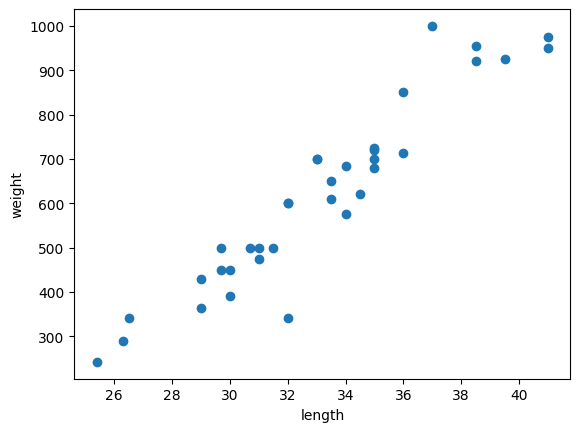

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

빙어 데이터


In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

빙어&도미 산점도를 그린다.

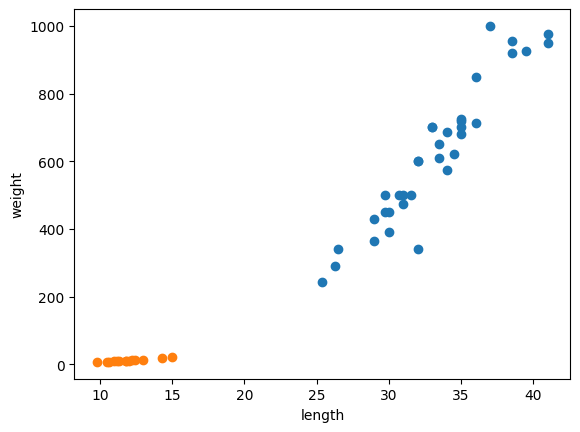

In [ ]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미와 빙어 데이터를 합친다.

In [ ]:
length = bream_length+smelt_length
weight = bream_weight + smelt_weight

사이킷런을 사용하기 위해서는 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야한다.

```python
#나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
zip()
```

In [ ]:
fish_data = [[l,w] for l,w in zip(length,weight)]

정답 데이터를 만들어야한다.

머신러닝에서 2개를 구분하는 경우, 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다.

도미(bream)과 빙어(smelt)를 순서대로 나열했기 때문에 정답 리스트는 1이 35번 등장하고 0이 14번 등장하면 된다.



In [ ]:
fish_target=[1]*35+ [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


사이킷런 패키지에서 K-최근접 이웃 알고리즘을 구현한 클래스인 ```KNeighborsClassifier```을 임포트 하고, fish_data와 fish_target을 전달해 도미를 찾기 위한 기준을 학습(훈련)시킨다.

사이킷런에서 ```fit()```이 훈련을 담당한다.
```score()```은 모델을 평가(정확도)하며 [0,1] 사이의 값을 반환한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(fish_data,fish_target)
kn.score(fish_data,fish_target)


1.0

새로운 데이터, [30,600]을 추가하여 예측해보자.

```predict()``` 메서드는 새로운 데이터의 정답을 예측한다.

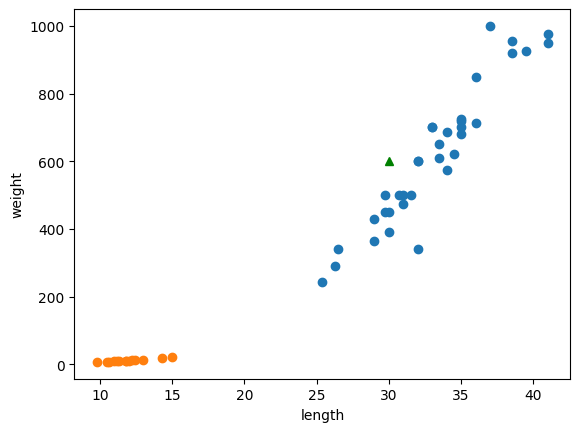

array([1])

In [ ]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
#새로운 데이터########
plt.plot(30,600,'g^')
######################
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30,600]])

k-최근접 이웃 알고리즘으로 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살핀다.

참고할 가까운 데이터의 개수를 늘리면 어떻게 될까?

```n_neighbors```파라미터로 이를 조절할 수 있고, 기본값은 5이다.
사용은 ```KNeighborsClassifier(n_neighbors=<개수>)```의 형식이다.

n_neighbors를 너무 크게 잡으면 제대로 예측할 수 없다. 만약에 참고하는 데이터의 개수를 49개로 잡는다면, 도미가 35개, 빙어가 14개 있으므로 무조건 도미라고 판단할 것이다.


In [ ]:
kn49= KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
print(kn49.score(fish_data,fish_target))

print(35/49)

0.7142857142857143
0.7142857142857143
